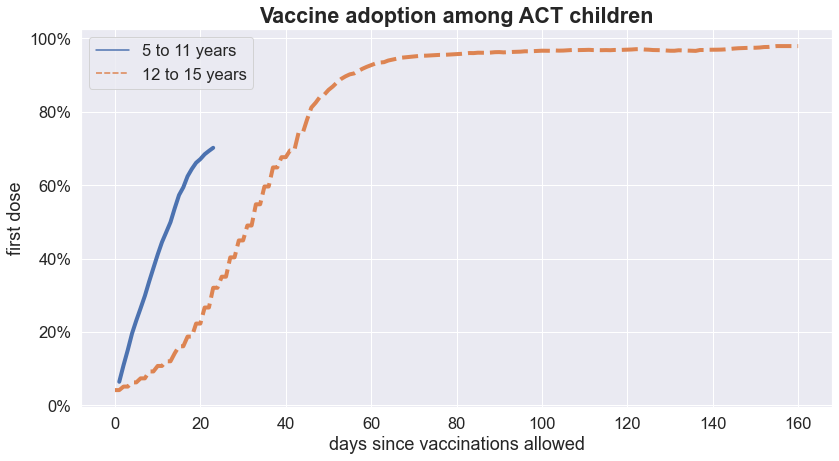

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt, matplotlib.dates as mdates, matplotlib.ticker as ticker
sns.set(font_scale=1.5)

data = pd.read_csv("fullVaxData.csv")
data.date = data.date.apply(lambda x: pd.Timestamp(x) - pd.Timedelta(days=1))
data.sort_values("date", inplace=True)
data.set_index("date", inplace=True)

data = data / [20401, 40207]

df = pd.DataFrame()

for i, d in enumerate(data.loc[[x for x in data.index if x > pd.Timestamp("2022-01-09")]]["ages 5-11"].values):
    df.at[i, "5 to 11 years"] = d

for i, d in enumerate(data["ages 12-15"].values):
    df.at[i, "12 to 15 years"] = d
    
fig, ax = plt.subplots(
    tight_layout=True,
    figsize=(12, 6.75)
)

sns.lineplot(data=df, ax=ax, lw=4)
plt.xlabel("days since vaccinations allowed")
plt.ylabel("first dose")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.title("Vaccine adoption among ACT children", fontsize="large", fontweight="bold")
plt.savefig("children.jpg")

In [6]:
data = pd.read_csv("./caseData.csv", parse_dates=["date"], index_col="date")

pcr_data = data.loc[[x for x in data.index if (x > pd.Timestamp("2022-01-31")) & (x < pd.Timestamp("2022-02-08"))]]
pos = pcr_data.pcr.sum() / (9875 + pcr_data.pcr.sum())

print(pos)
data.tail(25)

# data.to_csv("./caseData.csv")

0.1527968428277282


,new,total,recovered,average,active,hospitalised,intensive care,ventilated,dead,pcr,rat,tests,positivity,positivity_trend
date,,,,,,,,,,,,,,
2022-01-21,826.0,26675.0,21009.0,1326.000000,5647.0,62.0,2.0,1.0,2.0,259.0,567.0,NaN,NaN,0.204435
2022-01-22,666.0,27341.0,21858.0,1232.571429,5464.0,63.0,1.0,1.0,0.0,224.0,442.0,NaN,NaN,0.204435
2022-01-23,694.0,28035.0,22680.0,1143.714286,5336.0,67.0,3.0,2.0,0.0,385.0,309.0,NaN,NaN,0.204435
2022-01-24,756.0,28791.0,23701.0,1023.000000,5069.0,68.0,3.0,1.0,2.0,472.0,284.0,NaN,NaN,0.204435
2022-01-25,904.0,29695.0,24844.0,886.428571,4829.0,67.0,3.0,1.0,1.0,546.0,358.0,NaN,NaN,0.201265
2022-01-26,896.0,30591.0,25824.0,804.857143,4745.0,67.0,5.0,1.0,0.0,600.0,296.0,NaN,NaN,0.201265
2022-01-27,884.0,31475.0,26666.0,803.714286,4787.0,73.0,4.0,1.0,0.0,648.0,236.0,NaN,NaN,0.201265
2022-01-28,734.0,32209.0,27442.0,790.571429,4744.0,66.0,5.0,1.0,1.0,478.0,256.0,NaN,NaN,0.201265
2022-01-29,620.0,32829.0,28158.0,784.000000,4648.0,61.0,5.0,1.0,0.0,438.0,182.0,NaN,NaN,0.201265


In [134]:
data = pd.read_csv("./caseData.csv", parse_dates=["date"], index_col="date")

for i in data.index:
    temp = data.loc[[x for x in data.index if (x > i - pd.Timedelta(days=7)) & (x <= i)]]
    
    if i < pd.Timestamp("2022-01-18"):
        data.at[i, "positivity_trend"] = temp.positivity.mean()
        
    else:
        data.at[i, "positivity_trend"] = data.at[i, "positivity"]

data

,new,total,recovered,average,active,hospitalised,intensive care,ventilated,dead,pcr,rat,tests,positivity,positivity_trend
date,,,,,,,,,,,,,,
2021-08-11,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2021-08-12,4.0,4.0,0.0,0.571429,4.0,0.0,0.0,0.0,0.0,4.0,0.0,NaN,NaN,NaN
2021-08-13,2.0,6.0,0.0,0.857143,6.0,0.0,0.0,0.0,0.0,2.0,0.0,1329.0,0.001503,0.001503
2021-08-14,1.0,7.0,0.0,1.000000,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1982.0,0.000504,0.001003
2021-08-15,2.0,9.0,0.0,1.285714,9.0,0.0,0.0,0.0,0.0,2.0,0.0,3292.0,0.000607,0.000871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-06,323.0,36694.0,34046.0,468.714286,2623.0,60.0,2.0,1.0,0.0,180.0,143.0,NaN,NaN,NaN
2022-02-07,299.0,36993.0,34561.0,434.714286,2406.0,57.0,2.0,1.0,1.0,123.0,176.0,NaN,NaN,NaN
2022-02-08,495.0,37488.0,35092.0,430.857143,2369.0,55.0,1.0,1.0,1.0,264.0,231.0,NaN,NaN,NaN


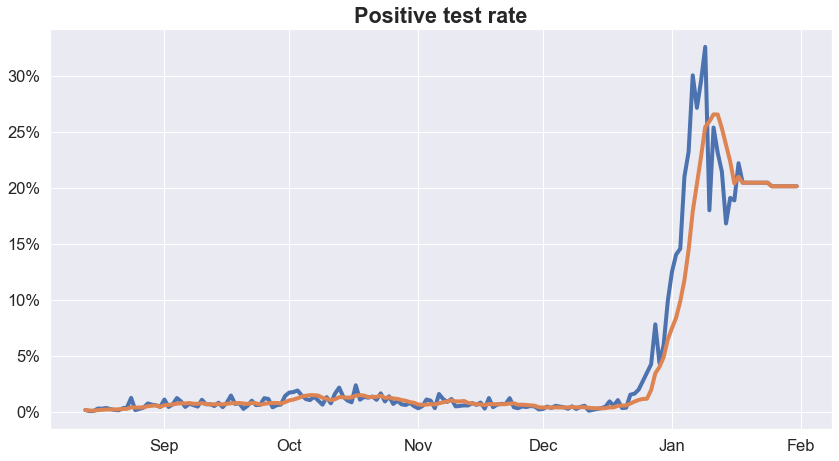

In [135]:
fig, ax = plt.subplots(
    tight_layout=True,
    figsize=(12, 6.75)
)

sns.lineplot(data=data, ax=ax, lw=4, x=data.index, y="positivity")
sns.lineplot(data=data, ax=ax, lw=4, x=data.index, y="positivity_trend")
plt.xlabel(None)
plt.ylabel(None)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1, 0))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.title("Positive test rate", fontsize="large", fontweight="bold")

data.to_csv("./caseData.csv")